# Syed Muhammad Zain Computer Vision AUTOENCODER


## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [3]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [4]:
Train_data1.shape

(112800, 785)

In [5]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [6]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [7]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [8]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [10]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [11]:
#normalizing x and one hot encoding y both are not dataframes
trainingx = trainingx.astype('float32') / 255
NOL=trainingy.nunique()#numberofthelabels
trainingy = np_utils.to_categorical(trainingy, NOL)
trainingx=trainingx.reshape(-1,28,28,1)#batch size first than width than height than channels
print(trainingy.shape)
print(trainingx.shape)

(112800, 47)
(112800, 28, 28, 1)


In [12]:
#same for testining 
test_data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-test.csv', header=None)
test_data1.shape
XTest=test_data1.drop(0,axis=1)
YTest=test_data1[0]
print(XTest.shape)
print(YTest.shape)
XTest=np.apply_along_axis(correctingimage, 1, XTest)
YTest=np_utils.to_categorical(YTest, NOL)
print(XTest.shape)
print(YTest.shape)
XTest = XTest.astype('float32') / 255
XTest= XTest.reshape(-1, 28, 28, 1)
print(XTest.shape)

(18800, 784)
(18800,)
(18800, 28, 28)
(18800, 47)
(18800, 28, 28, 1)


## ADDING GAUSSIAN NOISE

In [44]:
def noiseforimage(input1):#mean 0 variance 1
    noisemagnitude = 0.4
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage2(input1):#mean 0 variance 1
    noisemagnitude = 0.5
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage3(input1):#mean 0 variance 1
    noisemagnitude = 0.6
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage4(input1):#mean 0 variance 1
    noisemagnitude = 0.7
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage5(input1):#mean 0 variance 1
    noisemagnitude = 0.8
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage6(input1):#mean 0 variance 1
    noisemagnitude = 0.9
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)
def noiseforimage7(input1):#mean 0 variance 1
    noisemagnitude = 1
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)


In [45]:
NXTest=noiseforimage(XTest)
NXTest2=noiseforimage2(XTest)
NXTest3=noiseforimage3(XTest)
NXTest4=noiseforimage4(XTest)
NXTest5=noiseforimage5(XTest)
NXTest6=noiseforimage5(XTest)
NXTest7=noiseforimage5(XTest)


In [48]:
from keras.models import load_model
final_mod=load_model('/content/drive/MyDrive/Colab Notebooks/CV emnist project/CVmodel3.h5')

In [49]:
ModelAutoOut=final_mod.predict(NXTest)
ModelAutoOut2=final_mod.predict(NXTest2)
ModelAutoOut3=final_mod.predict(NXTest3)
ModelAutoOut4=final_mod.predict(NXTest4)
ModelAutoOut5=final_mod.predict(NXTest5)
ModelAutoOut6=final_mod.predict(NXTest6)
ModelAutoOut7=final_mod.predict(NXTest7)

## Comparison of Noise Factor Effects on Autoencoder or the ability of the autoencoder to filter the noise

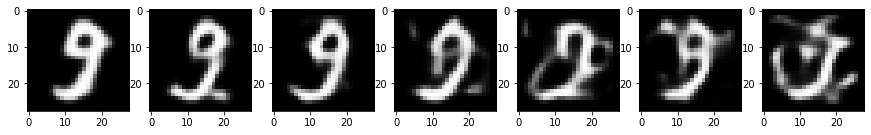

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,7,1)
plt.imshow(ModelAutoOut[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,2)
plt.imshow(ModelAutoOut2[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,3)
plt.imshow(ModelAutoOut3[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,4)
plt.imshow(ModelAutoOut4[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,5)
plt.imshow(ModelAutoOut5[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,6)
plt.imshow(ModelAutoOut6[0].reshape(28, 28), cmap='gray')
plt.subplot(1,7,7)
plt.imshow(ModelAutoOut7[0].reshape(28, 28), cmap='gray')


In [51]:
comparisonencoder={"NOISE FACTOR":[0.4,0.5,0.6,0.7,0.8,0.9,1],
                 "RECOVERY":['yes','yes','yes','no','no','no','no']
                }

In [52]:
comparison = pd.DataFrame(comparisonencoder)
comparison

,NOISE FACTOR,RECOVERY
0,0.4,yes
1,0.5,yes
2,0.6,yes
3,0.7,no
4,0.8,no
5,0.9,no
6,1.0,no
